<a href="https://colab.research.google.com/github/angel870326/NTU_Manufacturing_Data_Science/blob/main/MDS_Assignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> 2022.12.23 Ssu-Yun Wang<br/>
[Github @angel870326](https://github.com/angel870326)

# **Manufacturing Data Science Assignment 4**


1.   (40%) Data Imbalance Problem
2.   (30%) Programming Questions
3.   (30%) Markov Decision Process


In [ ]:
# sConnect to the Google Drive
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



---


##**1. (40%) Data Imbalance Problem**

在 UCI Machine Learning Repository 開放數據中包含了一個半導體製造數據([semiconductor manufacturing dataset](https://archive.ics.uci.edu/ml/datasets/SECOM))，一共包含了 1,567 個觀測值，而每個觀測值具有 590 個特徵（感測值的量測結果）以及作為目標值的測試結果（為二元變數，良品為 -1，不良品為 1），其中不良品僅有 104 個樣本。試著參考網路資源學習並撰寫程式，使用此數據回答下列問題。

In [ ]:
data_secom = pd.read_excel('/content/gdrive/MyDrive/碩二上/製造數據科學/Assignment/Assignment 4/Assignment4_Data/MDS_Assignment4_SECOM.xlsx', sheet_name=1).iloc[:,1:-1] # Drop column 'Time' which is not concerned in this case.
print(data_secom.shape)
data_secom

(1567, 591)


,Sensor_1,Sensor_2,Sensor_3,Sensor_4,Sensor_5,Sensor_6,Sensor_7,Sensor_8,Sensor_9,Sensor_10,...,Sensor_582,Sensor_583,Sensor_584,Sensor_585,Sensor_586,Sensor_587,Sensor_588,Sensor_589,Sensor_590,Label
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,1.3424,-0.0045,...,203.1720,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.1720,-1
1563,3052.31,2522.55,2198.5667,1124.6595,0.8763,100.0,98.4689,0.1205,1.4333,-0.0061,...,NaN,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.1720,-1
1564,2978.81,2379.78,2206.3000,1110.4967,0.8236,100.0,99.4122,0.1208,NaN,NaN,...,43.5231,0.4987,0.0153,0.0041,3.0590,0.0197,0.0086,0.0025,43.5231,-1
1565,2894.92,2532.01,2177.0333,1183.7287,1.5726,100.0,98.7978,0.1213,1.4622,-0.0072,...,93.4941,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941,-1


#### **Preprocessing**

In [ ]:
# Drop duplicate columns
data_secom_1 = data_secom.T.drop_duplicates().T
print(data_secom_1.shape)

(1567, 487)


In [ ]:
# Drop redundant columns
data_secom_clean = data_secom_1.loc[:,data_secom_1.apply(pd.Series.nunique) != 1]
print(data_secom_clean.shape)

(1567, 475)


In [ ]:
# Count missing values
count_nan = data_secom.isnull().sum().sum()
print ('Number of missing values: ', count_nan)

Number of missing values:  41951


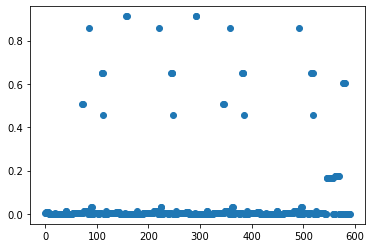

In [ ]:
# Percentage of missing values in each column
secom_nan = pd.DataFrame(data_secom.isnull().sum(), columns=['nan_count'])
secom_nan['nan_percent'] = secom_nan['nan_count'] / len(data_secom)
plt.scatter(range(0, secom_nan.shape[0]),secom_nan['nan_percent'])
plt.show()

In [ ]:
# Drop columns with more than 40% missing values
secom_nan_40up = secom_nan[secom_nan['nan_percent'] > 0.4]
nan_column_droplist = secom_nan_40up.index
data_secom_clean = data_secom_clean.drop(nan_column_droplist, axis = 1)
print(data_secom_clean.shape)

(1567, 443)


In [ ]:
# Missing Value Imputation: K-Nearest Neighbour (KNN) Imputation
from sklearn.impute import KNNImputer
knn_imputer = KNNImputer(missing_values=np.nan, n_neighbors=5, weights='uniform', metric='nan_euclidean') # default
data_secom_clean_imputed = pd.DataFrame(knn_imputer.fit_transform(data_secom_clean), columns=data_secom_clean.columns)
print(data_secom_clean_imputed.shape)
print ('Number of missing values: ', data_secom_clean_imputed.isnull().sum().sum())

(1567, 443)
Number of missing values:  0


In [ ]:
# Split data into x and y
data_secom_x = data_secom_clean_imputed.iloc[:, :-1]
data_secom_y = data_secom_clean_imputed['Label']
print(data_secom_x.shape)

(1567, 442)


###**(a) (15%) 試在該數據分析流程中加入數據平衡的步驟，使用三種方法來進行數據平衡 (e.g. 使用上抽樣、下抽樣或是代價敏感學習等)。**


In [ ]:
# Check if Y is imbalanced
data_secom_y.value_counts()

-1.0    1463
 1.0     104
Name: Label, dtype: int64

#### **Undersampling: Near Miss Undersampling**
https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.NearMiss.html

In [ ]:
from imblearn.under_sampling import NearMiss
data_secom_nearmiss_x, data_secom_nearmiss_y = NearMiss(version=3).fit_resample(data_secom_x, data_secom_y)
data_secom_nearmiss_y.value_counts()

-1.0    104
 1.0    104
Name: Label, dtype: int64

#### **Oversampling: SMOTE**
https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html

In [ ]:
from imblearn.over_sampling import SMOTE
data_secom_smote_x, data_secom_smote_y = SMOTE(random_state=42).fit_resample(data_secom_x, data_secom_y)
data_secom_smote_y.value_counts()

-1.0    1463
 1.0    1463
Name: Label, dtype: int64

#### **Combination of Undersampling and Oversampling**


In [ ]:
# Oversampling (ratio=0.5)
data_secom_over_x, data_secom_over_y = SMOTE(random_state=42, sampling_strategy=0.5).fit_resample(data_secom_x, data_secom_y)
# Undersampling (ratio=1)
data_secom_comb_x, data_secom_comb_y = NearMiss(sampling_strategy=1).fit_resample(data_secom_over_x, data_secom_over_y)
data_secom_comb_y.value_counts()

-1.0    731
 1.0    731
Name: Label, dtype: int64

###**(b) (5%) 建議選用哪種方法最為合適？為什麼？**

在多數群與少數群的比例為1的情況下，單純 undersampling 會有損失過多重要樣本的問題，而單純 oversampling 則會有過多重複樣本，若結合 undersampling 和 oversampling，則可以中和兩者的問題。

###**(c) (10%) 對於數據多數群與少數群的比例應當調整至多少？為什麼？試透過調整生成比率 (i.e. 敏感度分析) 來看模型分類結果。(提示：將敏感度分析以繪圖呈現兩條曲線，x 軸為不同生成比例、y 軸為偽陽性率 (false positive rate) 與偽陰性率 (false negative rate)**


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

In [ ]:
def svcPredictor(data_x, data_y):
    x_train, x_test, y_train, y_test = train_test_split(StandardScaler().fit_transform(data_x), data_y, test_size = 0.20, random_state = 42)
    model_svc_linear = LinearSVC().fit(x_train, y_train)
    test_predict = model_svc_linear.predict(x_test)
    return test_predict, y_test

#### **Undersampling**

In [ ]:
def undersampleAnalysis():
    under_analysis = pd.DataFrame(columns=['ratio','fp','fn'])
    for i in np.arange(0.1, 1.05, 0.05):
        under_x, under_y = NearMiss(sampling_strategy=round(i,2)).fit_resample(data_secom_x, data_secom_y)
        pred, answer = svcPredictor(under_x, under_y)
        cm = confusion_matrix(answer, pred)
        tn, fp, fn, tp = cm.ravel()

        item = {'ratio': round(i,2),
                'fp': fp/len(answer),
                'fn': fn/len(answer),
        }
        item_df = pd.DataFrame(item, index=[0])
        under_analysis = under_analysis.append(item_df)

    under_analysis = under_analysis.reset_index(drop=True)
    return under_analysis

In [ ]:
under_analysis = undersampleAnalysis()

In [ ]:
under_analysis

,ratio,fp,fn
0,0.10,0.117904,0.078603
1,0.15,0.087500,0.087500
2,0.20,0.128000,0.112000
3,0.25,0.125000,0.096154
4,0.30,0.177778,0.144444
5,0.35,0.222222,0.061728
6,0.40,0.164384,0.068493
7,0.45,0.223881,0.104478
8,0.50,0.206349,0.126984
9,0.55,0.237288,0.084746


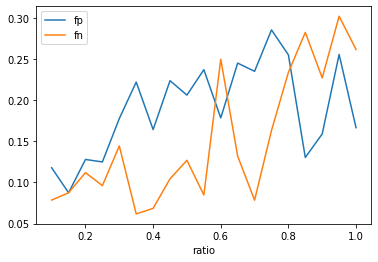

In [ ]:
under_analysis.plot(x='ratio', y=['fp', 'fn'])
plt.show()

In [ ]:
under_analysis['f_avg'] = (under_analysis['fp'] + under_analysis['fn'])/2
under_ratio = under_analysis.loc[under_analysis['f_avg'].idxmin(), 'ratio']
under_ratio

0.15

Since minority/majority has a minimum average miscalssification rate ((fp+fn)/2) at 0.15, we suggest that the ratio can be set to 0.15.

#### **Overersampling**

In [ ]:
def oversampleAnalysis():
    over_analysis = pd.DataFrame(columns=['ratio','fp','fn'])
    for i in np.arange(0.1, 1.05, 0.05):
        over_x, over_y = SMOTE(random_state=42, sampling_strategy=round(i,2)).fit_resample(data_secom_x, data_secom_y)
        pred, answer = svcPredictor(over_x, over_y)
        cm = confusion_matrix(answer, pred)
        tn, fp, fn, tp = cm.ravel()

        item = {'ratio': round(i,2),
                'fp': fp/len(answer),
                'fn': fn/len(answer),
        }
        item_df = pd.DataFrame(item, index=[0])
        over_analysis = over_analysis.append(item_df)

    over_analysis = over_analysis.reset_index(drop=True)
    return over_analysis

In [ ]:
over_analysis = oversampleAnalysis()

In [ ]:
over_analysis

,ratio,fp,fn
0,0.10,0.093168,0.037267
1,0.15,0.127596,0.014837
2,0.20,0.108262,0.019943
3,0.25,0.092896,0.010929
4,0.30,0.102362,0.007874
5,0.35,0.081013,0.002532
6,0.40,0.107317,0.002439
7,0.45,0.072941,0.000000
8,0.50,0.079727,0.000000
9,0.55,0.081498,0.000000


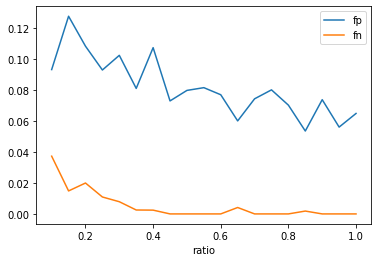

In [ ]:
over_analysis.plot(x='ratio', y=['fp', 'fn'])
plt.show()

In [ ]:
over_analysis['f_avg'] = (over_analysis['fp'] + over_analysis['fn'])/2
over_ratio = over_analysis.loc[over_analysis['f_avg'].idxmin(), 'ratio']
over_ratio

0.85

Since minority/majority has a minimum average miscalssification rate ((fp+fn)/2) at 0.85, we suggest that the ratio can be set to 0.85.

###**(d) (10%) 試說明特徵挑選步驟應於數據平衡前或後，這對預測結果有何影響？**



Feature selection is not suitable for imbalanced data as they tend to be biased towards the majority class. We can only conclude that the selected features are important for the majority. Predicting results of the minority may not be as good as those of the majority since the discriminating features may not be chosen. It is more reasonable for us to use a complete dataset to Therefore, feature selection should be implemented after the process of data balancing.





---


##**2. (30%) Programming Questions**

Please use Python to answer the following questions. Provide your code and justify your answer. Show all your work in detail including specific algorithm and parameter design. You should hand in ***TWO files (one for Tabu and one for Genetic Algorithm)*** regarding to each meta-heuristic algorithm, respectively. The result should include ***optimal solution (i.e., job sequence), optimal function (i.e. fitness) value, running time, number of tardy jobs***. For the parameter settings (eg. tabu size, crossover rate, mutation rate, etc.), please give a simple ***trial-and-error*** or ***design of experiment*** for sensitivity analysis.

Single-Machine Scheduling Problem

Please answer following single-machine total weighted tardiness problem. The objective function is to minimize the total weighted tardiness.


<img src="https://drive.google.com/uc?export=view&id=1UdN2GZjCKRltwgmj24pRVJN8QIgtwavX" width="800"/>


In [ ]:
import time

In [ ]:
input_data = {1: {'processing_time': 10, 'due_date': 50, 'weight': 10},
              2: {'processing_time': 10, 'due_date': 38, 'weight': 5},
              3: {'processing_time': 13, 'due_date': 49, 'weight': 1},
              4: {'processing_time': 4, 'due_date': 12, 'weight': 5},
              5: {'processing_time': 9, 'due_date': 20, 'weight': 10},
              6: {'processing_time': 4, 'due_date': 105, 'weight': 1},
              7: {'processing_time': 8, 'due_date': 73, 'weight': 5},
              8: {'processing_time': 15, 'due_date': 45, 'weight': 10},
              9: {'processing_time': 7, 'due_date': 6, 'weight': 5},
              10: {'processing_time': 1, 'due_date': 64, 'weight': 1},
              11: {'processing_time': 9, 'due_date': 15, 'weight': 5},
              12: {'processing_time': 3, 'due_date': 6, 'weight': 10},
              13: {'processing_time': 15, 'due_date': 92, 'weight': 10},
              14: {'processing_time': 9, 'due_date': 43, 'weight': 5},
              15: {'processing_time': 11, 'due_date': 78, 'weight': 1},
              16: {'processing_time': 6, 'due_date': 21, 'weight': 10},
              17: {'processing_time': 5, 'due_date': 15, 'weight': 5},
              18: {'processing_time': 14, 'due_date': 50, 'weight': 5},
              19: {'processing_time': 18, 'due_date': 150, 'weight': 1},
              20: {'processing_time': 3, 'due_date': 99, 'weight': 5}}

###**(a) (0%) Learn Genetic**

https://www.youtube.com/watch?v=kHyNqSnzP8Y 

https://www.youtube.com/watch?v=Fdk7ZKJHFcI .

###**(b) (15%) Develop Tabu Search (TS) algorithm to solve the problem. Show your design and the “result”.**

Reference: https://medium.com/swlh/tabu-search-in-python-3199c44d44f1

In [ ]:
import random as rd
from itertools import combinations
import math

In [ ]:
class TS():
    def __init__(self, seed, tabu_tenure, terminate):
    # def __init__(self, seed, tabu_tenure, Penalization_weight):
        self.start_time_tabu = time.time()
        self.seed = seed
        self.tabu_tenure = tabu_tenure # Tabu list size
        self.terminate = terminate
        # self.Penalization_weight = Penalization_weight
        self.input_dict = input_data
        self.Initial_solution = self.get_InitialSolution()
        self.tabu_str, self.Best_solution, self.Best_objvalue, self.Best_tardy_jobs = self.TabuSearch()
        self.end_time_tabu = time.time()
        # print("Running time: {}".format(end_time_tabu - start_time_tabu))
        # self.tabu_result = self.Result()

    def get_tabuestructure(self):
        '''
        Takes a dict (input data)
        Returns a dict of tabu attributes (pair of jobs that are swapped) as keys and [tabu_time, MoveValue]
        '''
        dict = {}
        for swap in combinations(self.input_dict.keys(), 2):
            dict[swap] = {'tabu_time': 0, 'MoveValue': 0}
            # dict[swap] = {'tabu_time': 0, 'MoveValue': 0, 'freq': 0, 'Penalized_MV': 0}
        return dict

    def get_InitialSolution(self, show=False):
        n_jobs = len(self.input_dict) # number of jobs
        # Produce a random schedule of jobs
        initial_solution = list(range(1, n_jobs+1))
        rd.seed(self.seed)
        rd.shuffle(initial_solution)
        if show == True:
            print("initial Random Solution: {}".format(initial_solution))
        return initial_solution

    def Objfun(self, solution, show=False):
        '''
        Takes a set of scheduled jobs, dict (input data)
        Return the objective function value of the solution
        '''
        dict = self.input_dict
        t = 0   # starting time
        objfun_value = 0
        n_tardy_jobs = 0   # number of tardy jobs

        for job in solution:
            C_i = t + dict[job]["processing_time"]  # completion time
            d_i = dict[job]["due_date"]   # due date of the job
            T_i = max(0, C_i - d_i)    # tardiness for the job
            W_i = dict[job]["weight"]  # job's weight

            objfun_value +=  W_i * T_i
            t = C_i
            if T_i > 0:
                n_tardy_jobs += 1
        
        if show == True:
            print("\n","#"*8, "The Objective function value for {} solution schedule is: {}".format(solution ,objfun_value),"#"*8)
        return objfun_value, n_tardy_jobs

    def SwapMove(self, solution, i ,j):
        '''
        Take a list (solution)
        return a new neighbor solution with i, j swapped
        '''
        solution = solution.copy()
        # job index in the solution:
        i_index = solution.index(i)
        j_index = solution.index(j)
        #Swap
        solution[i_index], solution[j_index] = solution[j_index], solution[i_index]
        return solution

    def TabuSearch(self, show=False):
        '''
        The implementation Tabu search algorithm with short-term memory and pair_swap as Tabu attribute.
        '''
        # Parameters:
        tenure = self.tabu_tenure
        tabu_structure = self.get_tabuestructure()  # Initialize the data structures
        best_solution = self.Initial_solution
        best_objvalue, best_tardy_jobs = self.Objfun(best_solution)
        current_solution = self.Initial_solution
        current_objvalue, current_tardy_jobs = self.Objfun(current_solution)

        if show == True:
            print("#"*30, "Short-term memory TS with Tabu Tenure: {}\nInitial solution: {}, Initial objvalue: {}, Initial tardy jobs: {}".format(
                tenure, current_solution, current_objvalue, current_tardy_jobs), "#"*30, sep='\n\n')
        iter = 1
        Terminate = 0
        while Terminate < self.terminate:
            if show == True:
                print('\n\n### iter {}###  Current_Objvalue: {}, Best_Objvalue: {}, Best_Tardy_Jobs: {}'.format(iter, current_objvalue, best_objvalue, best_tardy_jobs))
            
            # Searching the whole neighborhood of the current solution:
            for move in tabu_structure:
                candidate_solution = self.SwapMove(current_solution, move[0], move[1])
                candidate_objvalue, candidate_tardy_jobs = self.Objfun(candidate_solution)
                tabu_structure[move]['MoveValue'] = candidate_objvalue
                # Penalized objValue by adding freq to Objvalue (minimization):
                # tabu_structure[move]['Penalized_MV'] = candidate_objvalue + (tabu_structure[move]['freq'] * self.Penalization_weight)

            # Admissible move
            while True:
                # select the move with the lowest ObjValue in the neighborhood (minimization)
                best_move = min(tabu_structure, key =lambda x: tabu_structure[x]['MoveValue'])
                MoveValue = tabu_structure[best_move]["MoveValue"]
                tabu_time = tabu_structure[best_move]["tabu_time"]
                # Penalized_MV = tabu_structure[best_move]["Penalized_MV"]

                # Not Tabu
                if tabu_time < iter:
                    # make the move
                    current_solution = self.SwapMove(current_solution, best_move[0], best_move[1])
                    current_objvalue, current_tardy_jobs = self.Objfun(current_solution)
                    # Best Improving move
                    if MoveValue < best_objvalue:
                        best_solution = current_solution
                        best_objvalue = current_objvalue
                        if show == True:
                            print("   best_move: {}, Objvalue: {} => Best Improving => Admissible".format(best_move, current_objvalue))
                        Terminate = 0
                    else:
                        if show == True:
                            print("   ##Termination: {}## best_move: {}, Objvalue: {} => Least non-improving => "
                              "Admissible".format(Terminate, best_move, current_objvalue))
                        Terminate += 1
                    # update tabu_time for the move
                    tabu_structure[best_move]['tabu_time'] = iter + tenure
                    # tabu_structure[best_move]['freq'] += 1
                    iter += 1
                    break

                # If tabu
                else:
                    # Aspiration
                    if MoveValue < best_objvalue:
                        # make the move
                        current_solution = self.SwapMove(current_solution, best_move[0], best_move[1])
                        current_objvalue, current_tardy_jobs = self.Objfun(current_solution)
                        best_solution = current_solution
                        best_objvalue = current_objvalue
                        if show == True:
                            print("   best_move: {}, Objvalue: {} => Aspiration => Admissible".format(best_move, current_objvalue))
                        # tabu_structure[best_move]['freq'] += 1
                        Terminate = 0
                        iter += 1
                        break
                    else:
                        tabu_structure[best_move]["MoveValue"] = float('inf')
                        # tabu_structure[best_move]['Penalized_MV'] = float('inf')
                        if show == True:
                            print("   best_move: {}, Objvalue: {} => Tabu => Inadmissible".format(best_move, current_objvalue))
                        continue
        if show == True:
            print('\n\n','#'*50)
            print("Performed iterations: {}\nOptimal solution: {}\nOptimal function value: {}\nNumber of tardy jobs: {}".format(iter, best_solution, best_objvalue, best_tardy_jobs), sep="\n\n")
        return tabu_structure, best_solution, best_objvalue, best_tardy_jobs

    def Result(self):
        return "Optimal solution: {}\nOptimal function value: {}\nNumber of tardy jobs: {}\nRunning time: {}".format(self.Best_solution, self.Best_objvalue, self.Best_tardy_jobs, self.end_time_tabu - self.start_time_tabu)


#### **Sensitivity Analysis**

seeds & tabu_size

In [ ]:
tabu_analysis = pd.DataFrame(columns=['seeds','tabu size','fitness','tardy'])
min_fitness_tabu = 9999
for i in range(100, 3000, 100):
    for j in range(3, 20):
        tabu = TS(seed = i, tabu_tenure=j, terminate = 100)
        item = {'seeds': i,
                'tabu size': j,
                'fitness': tabu.Best_objvalue,
                'tardy': tabu.Best_tardy_jobs,
        }
        item_df = pd.DataFrame(item, index=[0])
        tabu_analysis = tabu_analysis.append(item_df)
        if tabu.Best_objvalue < min_fitness_tabu:
            min_fitness_tabu = tabu.Best_objvalue

tabu_analysis = tabu_analysis.reset_index(drop=True)
tabu_analysis

,seeds,tabu size,fitness,tardy
0,100,3,1928,14
1,100,4,1928,14
2,100,5,1928,14
3,100,6,1928,14
4,100,7,1928,14
...,...,...,...,...
488,2900,15,1928,14
489,2900,16,1928,14
490,2900,17,1928,14
491,2900,18,1928,14


In [ ]:
# Overview
tabu_analysis['fitness'] = tabu_analysis['fitness'].astype(int)
tabu_analysis['tardy'] = tabu_analysis['tardy'].astype(int)
tabu_analysis.describe()

,fitness,tardy
count,493.0,493.000000
mean,1928.0,14.862069
std,0.0,1.280419
min,1928.0,13.000000
25%,1928.0,14.000000
50%,1928.0,15.000000
75%,1928.0,16.000000
max,1928.0,18.000000


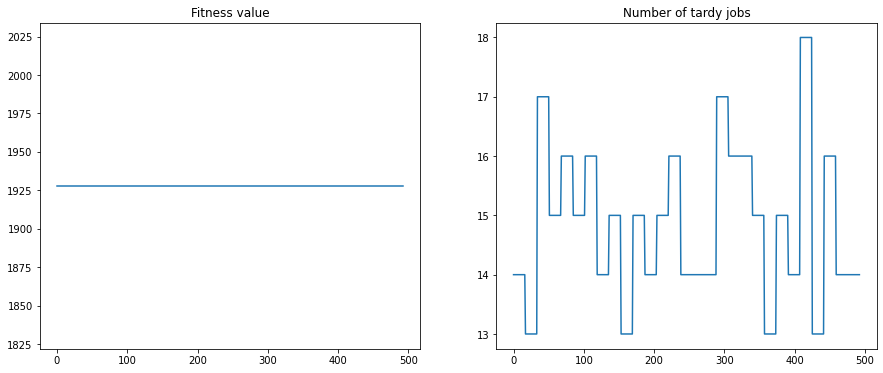

In [ ]:
# Plot
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
ax0.plot(tabu_analysis['fitness'])
ax0.set_title('Fitness value')
ax1.plot(tabu_analysis['tardy'])
ax1.set_title('Number of tardy jobs')
plt.show()

From the plot of the fitness value above, we find the value is fixed at 1928, this is because we select the move with the lowest objective value in the neighborhood. Therefore, we just simply set the tabu size at 3 and find the lowest number of tardy jobs.

In [ ]:
# Minimum number of tardy jobs
minvalueID_tardy = tabu_analysis['tardy'].idxmin()
tabu_analysis.iloc[minvalueID_tardy, :]

seeds         200
tabu size       3
fitness      1928
tardy          13
Name: 17, dtype: object

#### **Final result**

In [ ]:
tabu_result = TS(seed = 2200, tabu_tenure=3, terminate = 1000)
print(tabu_result.Result())

Optimal solution: [12, 17, 4, 16, 5, 9, 8, 1, 14, 10, 7, 13, 20, 11, 2, 18, 6, 15, 3, 19]
Optimal function value: 1928
Number of tardy jobs: 13
Running time: 2.490741491317749


###**(c) (15%) Develop Genetic Algorithm (GA) to solve the problem. Show your design and the “result”.**




In [ ]:
import copy

In [ ]:
# Input data
input_data_list = pd.DataFrame(input_data).values.tolist()
num_job = len(input_data)
p = input_data_list[0]
d = input_data_list[1]
w = input_data_list[2]

In [ ]:
# Parameters
population_size = 30
mutation_selection_rate = 0.5
num_mutation_jobs = round(num_job*mutation_selection_rate)
# num_iteration = 1000

In [ ]:
class GA():
    def __init__(self, crossover_rate, mutation_rate, num_iteration):
        self.start_time_ga = time.time()
        self.crossover_rate = crossover_rate
        self.mutation_rate = mutation_rate 
        self.num_iteration = num_iteration  
        self.Tbest, self.population_list = self.InitialPopulation()
        self.best_sequence, self.best_value, self.num_tardy = self.CrossoverMutation()
        self.end_time_ga = time.time()

    def InitialPopulation(self):
        Tbest=99999999999
        best_list, best_obj = [], []
        population_list = []
        for i in range(population_size):
            random_num = list(np.random.permutation(num_job))   # generate a random permutation of 0 to num_job-1
            population_list.append(random_num)   # add to the population_list
        return Tbest, population_list

    def CrossoverMutation(self):
        for n in range(self.num_iteration):
            Tbest_now = 9999999

            # Crossover
            parent_list = copy.deepcopy(self.population_list)
            offspring_list = copy.deepcopy(self.population_list)
            S = list(np.random.permutation(population_size))   # generate a random sequence to select the parent chromosome to crossover
    
            for m in range(int(population_size/2)):
                crossover_prob = np.random.rand()
                if self.crossover_rate >= crossover_prob:
                    parent_1 = self.population_list[S[2*m]][:]
                    parent_2 = self.population_list[S[2*m+1]][:]
                    child_1 = ['na' for i in range(num_job)]
                    child_2 = ['na' for i in range(num_job)]
                    fix_num = round(num_job/2)
                    g_fix = list(np.random.choice(num_job, fix_num, replace=False))
            
                    for g in range(fix_num):
                        child_1[g_fix[g]] = parent_2[g_fix[g]]
                        child_2[g_fix[g]] = parent_1[g_fix[g]]
                    c1 = [parent_1[i] for i in range(num_job) if parent_1[i] not in child_1]
                    c2 = [parent_2[i] for i in range(num_job) if parent_2[i] not in child_2]
            
                    for i in range(num_job-fix_num):
                        child_1[child_1.index('na')] = c1[i]
                        child_2[child_2.index('na')] = c2[i]
                    offspring_list[S[2*m]] = child_1[:]
                    offspring_list[S[2*m+1]] = child_2[:]

            # Mutation
            for m in range(len(offspring_list)):
                mutation_prob=np.random.rand()
                if self.mutation_rate >= mutation_prob:
                    m_chg = list(np.random.choice(num_job, num_mutation_jobs, replace=False))   # chooses the position to mutation
                    t_value_last = offspring_list[m][m_chg[0]]   # save the value which is on the first mutation position
                    for i in range(num_mutation_jobs-1):
                        offspring_list[m][m_chg[i]] = offspring_list[m][m_chg[i+1]]   # displacement
                    offspring_list[m][m_chg[num_mutation_jobs-1]] = t_value_last   # move the value of the first mutation position to the last mutation position
    
            # Fitness value (calculate tardiness)
            total_chromosome = copy.deepcopy(parent_list) + copy.deepcopy(offspring_list) # parent and offspring chromosomes combination
            chrom_fitness, chrom_fit = [], []
            total_fitness = 0
            for i in range(population_size*2):
                ptime = 0
                tardiness = 0
                for j in range(num_job):
                    ptime = ptime + p[total_chromosome[i][j]]
                    tardiness = tardiness + w[total_chromosome[i][j]]*max(ptime-d[total_chromosome[i][j]],0)
                chrom_fitness.append(1/tardiness)
                chrom_fit.append(tardiness)
                total_fitness = total_fitness + chrom_fitness[i]
    
            # Selection
            pk, qk = [], []

            for i in range(population_size*2):
                pk.append(chrom_fitness[i]/total_fitness)
            for i in range(population_size*2):
                cumulative = 0
                for j in range(0,i+1):
                    cumulative = cumulative+pk[j]
                qk.append(cumulative)
    
            selection_rand = [np.random.rand() for i in range(population_size)]
    
            for i in range(population_size):
                if selection_rand[i] <= qk[0]:
                    self.population_list[i] = copy.deepcopy(total_chromosome[0])
                else:
                    for j in range(0,population_size*2-1):
                        if selection_rand[i] > qk[j] and selection_rand[i] <= qk[j+1]:
                            self.population_list[i] = copy.deepcopy(total_chromosome[j+1])
                            break
            # Comparison
            for i in range(population_size*2):
                if chrom_fit[i] < Tbest_now:
                    Tbest_now = chrom_fit[i]
                    sequence_now = copy.deepcopy(total_chromosome[i])
    
            if Tbest_now <= self.Tbest:
                self.Tbest = Tbest_now
                sequence_best = copy.deepcopy(sequence_now)
    
            job_sequence_ptime = 0
            num_tardy = 0
            for k in range(num_job):
                job_sequence_ptime = job_sequence_ptime + p[sequence_best[k]]
                if job_sequence_ptime > d[sequence_best[k]]:
                    num_tardy += 1

        return sequence_best, self.Tbest, num_tardy

    def Result(self):
        return "Optimal solution: {}\nOptimal function value: {}\nNumber of tardy jobs: {}\nRunning time: {}".format(self.best_sequence, self.best_value, self.num_tardy, self.end_time_ga - self.start_time_ga)

#### **Sensitivity Analysis**

crossover rate & mutation rate

In [ ]:
ga_result = ""

In [ ]:
ga_analysis = pd.DataFrame(columns=['crossover_rate','mutation_rate','fitness','tardy'])
min_fitness_ga = 9999
for i in np.arange(0, 1.1, 0.1):
    for j in np.arange(0, 1.1, 0.1):
        ga = GA(crossover_rate = i, mutation_rate = j, num_iteration = 1000)
        item = {'crossover_rate': i,
                'mutation_rate': j,
                'fitness': ga.best_value,
                'tardy': ga.num_tardy,
        }
        item_df = pd.DataFrame(item, index=[0])
        ga_analysis = ga_analysis.append(item_df)
        if ga.best_value < min_fitness_ga:
          min_fitness_ga = ga.best_value
          ga_result = ga.Result()     

ga_analysis = ga_analysis.reset_index(drop=True)
ga_analysis

,crossover_rate,mutation_rate,fitness,tardy
0,0.0,0.0,4960,12
1,0.0,0.1,2832,16
2,0.0,0.2,2612,16
3,0.0,0.3,2546,18
4,0.0,0.4,2517,16
...,...,...,...,...
116,1.0,0.6,2407,14
117,1.0,0.7,2604,16
118,1.0,0.8,2715,15
119,1.0,0.9,2536,13


In [ ]:
# Overview
ga_analysis['fitness'] = ga_analysis['fitness'].astype(int)
ga_analysis['tardy'] = ga_analysis['tardy'].astype(int)
ga_analysis.describe()

,crossover_rate,mutation_rate,fitness,tardy
count,121.000000,121.000000,121.000000,121.000000
mean,0.500000,0.500000,2479.305785,14.727273
std,0.317543,0.317543,397.071548,1.329160
min,0.000000,0.000000,1985.000000,12.000000
25%,0.200000,0.200000,2220.000000,14.000000
50%,0.500000,0.500000,2494.000000,15.000000
75%,0.800000,0.800000,2616.000000,16.000000
max,1.000000,1.000000,4960.000000,18.000000


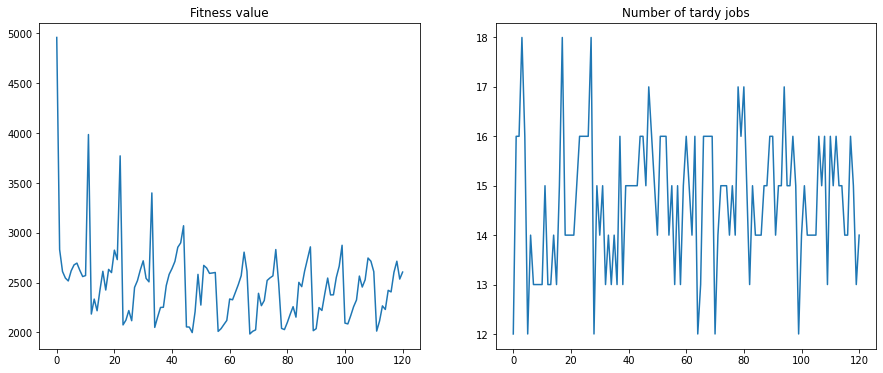

In [ ]:
# Plot
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
ax0.plot(ga_analysis['fitness'])
ax0.set_title('Fitness value')
ax1.plot(ga_analysis['tardy'])
ax1.set_title('Number of tardy jobs')
plt.show()

In [ ]:
# Minimum fitness value
minvalueID_fitness = ga_analysis['fitness'].idxmin()
ga_analysis.iloc[minvalueID_fitness, :]

crossover_rate       0.6
mutation_rate        0.1
fitness           1985.0
tardy               16.0
Name: 67, dtype: float64

In [ ]:
# Minimum number of tardy jobs
minvalueID_tardy = ga_analysis['tardy'].idxmin()
ga_analysis.iloc[minvalueID_tardy, :]

crossover_rate       0.0
mutation_rate        0.0
fitness           4960.0
tardy               12.0
Name: 0, dtype: float64

In [ ]:
# Sort by fitness values
ga_analysis_sort = ga_analysis.sort_values(by=['fitness'])
ga_analysis_sort.iloc[:10, :]

,crossover_rate,mutation_rate,fitness,tardy
67,0.6,0.1,1985,16
47,0.4,0.3,1999,17
56,0.5,0.1,2011,13
68,0.6,0.2,2012,16
111,1.0,0.1,2014,15
89,0.8,0.1,2018,16
69,0.6,0.3,2026,16
79,0.7,0.2,2029,16
57,0.5,0.2,2038,15
90,0.8,0.2,2038,16


#### **Final result**

In [ ]:
print(ga_result)

Optimal solution: [11, 3, 16, 4, 15, 8, 1, 0, 7, 9, 6, 12, 19, 13, 10, 5, 17, 14, 2, 18]
Optimal function value: 1985
Number of tardy jobs: 16
Running time: 13.512831926345825




---


##**3. (30%) Markov Decision Process**

考慮一個沒有折損因子的機台維修保養的馬可夫決策過程，機台有四個狀態 (健康, 可用, 耗損, 損壞)，其各別獎勵為 (6, 3, 1, -15)。「損壞」狀態為吸收狀態 (absorbing)，行動主要有兩種 (加工, 保養)。

*   在狀態「健康」的情況下，採取行動「加工」，轉移到「健康」的機率為 0.7；轉移到「可用」的機率為 0.2；轉移到「耗損」的機率為 0.1；轉移到「損壞」的機率為 0.0。

*   在狀態「健康」的情況下，採取行動「保養」，轉移到「健康」的機率為 1.0；轉移到其他狀態的機率為 0.0。

*   在狀態「可用」的情況下，採取行動「加工」，轉移到「健康」的機率為 0.0；轉移到「可用」的機率為 0.6；轉移到「耗損」的機率為 0.3；轉移到「損壞」的機率為 0.1。

*   在狀態「可用」的情況下，採取行動「保養」，轉移到「健康」的機率為 0.8；轉移到「可用」的機率為 0.2；轉移到其他狀態的機率為 0.0。

*   在狀態「耗損」的情況下，採取行動「加工」，轉移到「健康」的機率為 0.0；轉移到「可用」的機率為 0.1；轉移到「耗損」的機率為 0.5；轉移到「損壞」的機率為 0.4。

*   在狀態「耗損」的情況下，採取行動「保養」，轉移到「健康」的機率為 0.2；轉移到「可用」的機率為 0.5；轉移到「耗損」的機率為 0.3；轉移到「損壞」的機率為 0.0。

試著參考網路資源學習並撰寫程式，使用此數據回答下列問題。

### **Setup**

Reference: https://levelup.gitconnected.com/fundamentals-of-reinforcement-learning-value-iteration-and-policy-iteration-with-tutorials-a7ad0049c84f

In [4]:
import sys
import random
import numpy as np
from gym.utils import seeding

try:
    from graphviz import Digraph
    import graphviz
    has_graphviz = True
except ImportError:
    has_graphviz = False

class MDP:
    def __init__(self, transition_probs, rewards, initial_state=None, seed=None):
        """
        Defines an MDP. Compatible with gym Env.
        :param transition_probs: transition_probs[s][a][s_next] = P(s_next | s, a)
            A dict[state -> dict] of dicts[action -> dict] of dicts[next_state -> prob]
            For each state and action, probabilities of next states should sum to 1
            If a state has no actions available, it is considered terminal
        :param rewards: rewards[s][a][s_next] = r(s,a,s')
            A dict[state -> dict] of dicts[action -> dict] of dicts[next_state -> reward]
            The reward for anything not mentioned here is zero.
        :param get_initial_state: a state where agent starts or a callable() -> state
            By default, picks initial state at random.
        States and actions can be anything you can use as dict keys, but it is recommended to use strings or integers
        """
        self._check_param_consistency(transition_probs, rewards)
        self._transition_probs = transition_probs
        self._rewards = rewards
        self._initial_state = initial_state
        self.n_states = len(transition_probs)
        self.reset()
        self.np_random, _ = seeding.np_random(seed)

    def get_all_states(self):
        """ return a tuple of all possiblestates """
        return tuple(self._transition_probs.keys())

    def get_possible_actions(self, state):
        """ return a tuple of possible actions in a given state """
        return tuple(self._transition_probs.get(state, {}).keys())

    def is_terminal(self, state):
        """ return True if state is terminal or False if it isn't """
        return len(self.get_possible_actions(state)) == 0

    def get_next_states(self, state, action):
        """ return a dictionary of {next_state1 : P(next_state1 | state, action), next_state2: ...} """
        assert action in self.get_possible_actions(state), "cannot do action %s from state %s" % (action, state)
        return self._transition_probs[state][action]

    def get_transition_prob(self, state, action, next_state):
        """ return P(next_state | state, action) """
        return self.get_next_states(state, action).get(next_state, 0.0)

    def get_reward(self, next_state):
        """ return the reward you get for taking action in state and landing on next_state"""
        # assert action in self.get_possible_actions(state), "cannot do action %s from state %s" % (action, state)
        return self._rewards.get(next_state, 0.0)

    def reset(self):
        """ reset the game, return the initial state"""
        if self._initial_state is None:
            self._current_state = self.np_random.choice(
                tuple(self._transition_probs.keys()))
        elif self._initial_state in self._transition_probs:
            self._current_state = self._initial_state
        elif callable(self._initial_state):
            self._current_state = self._initial_state()
        else:
            raise ValueError(
                "initial state %s should be either a state or a function() -> state" % self._initial_state)
        return self._current_state

    def step(self, action):
        """ take action, return next_state, reward, is_done, empty_info """
        possible_states, probs = zip(*self.get_next_states(self._current_state, action).items())
        next_state = possible_states[self.np_random.choice(np.arange(len(possible_states)), p=probs)]
        reward = self.get_reward(next_state)
        is_done = self.is_terminal(next_state)
        self._current_state = next_state
        return next_state, reward, is_done, {}

    def render(self):
        print("Currently at %s" % self._current_state)

    def _check_param_consistency(self, transition_probs, rewards):
        for state in transition_probs:
            assert isinstance(transition_probs[state], dict), \
                "transition_probs for %s should be a dictionary but is instead %s" % (
                    state, type(transition_probs[state]))
            for action in transition_probs[state]:
                assert isinstance(transition_probs[state][action], dict), \
                    "transition_probs for %s, %s should be a a dictionary but is instead %s" % (
                        state, action, type(transition_probs[state][action]))
                next_state_probs = transition_probs[state][action]
                assert len(next_state_probs) != 0, "from state %s action %s leads to no next states" % (state, action)
                sum_probs = sum(next_state_probs.values())
                assert abs(sum_probs - 1) <= 1e-10, \
                    "next state probabilities for state %s action %s add up to %f (should be 1)" % (
                        state, action, sum_probs)
        # for state in rewards:
        #     assert isinstance(rewards[state], dict), \
        #         "rewards for %s should be a dictionary but is instead %s" % (
        #             state, type(rewards[state]))
        #     for action in rewards[state]:
        #         assert isinstance(rewards[state][action], dict), \
        #             "rewards for %s, %s should be a a dictionary but is instead %s" % (
        #                 state, action, type(rewards[state][action]))
        msg = "The Enrichment Center once again reminds you that Android Hell is a real place where" \
              " you will be sent at the first sign of defiance."
        assert None not in transition_probs, "please do not use None as a state identifier. " + msg
        assert None not in rewards, "please do not use None as an action identifier. " + msg

In [5]:
def get_optimal_action(mdp, state_values, state, gamma=0.9):
    """ Finds optimal action using formula above. """
    if mdp.is_terminal(state): return None    
    optimal_actions = {a: get_action_value(mdp, state_values, state, a, gamma) for a in mdp.get_possible_actions(state)}
    optimal_actions = max(optimal_actions, key=optimal_actions.get)
    return optimal_actions

In [6]:
transition_probs = {
  'healthy':{
    'process': {'healthy': 0.7, 'available': 0.2, 'wear&tear': 0.1, 'absorbing': 0.0},
    'maintain': {'healthy': 1.0},
  },
  'available':{
    'process': {'available': 0.6, 'wear&tear': 0.3, 'absorbing': 0.1},
    'maintain': {'healthy': 0.8, 'available': 0.2}
  },
  'wear&tear':{
    'process': {'available': 0.1, 'wear&tear': 0.5, 'absorbing': 0.4},
    'maintain': {'healthy': 0.2, 'available': 0.5, 'wear&tear': 0.3}
  },
  'absorbing':{
    'process': {'absorbing': 1.0},
    'maintain': {'absorbing': 1.0}
  }
}

rewards = {'healthy': +6,
           'available': +3, 
           'wear&tear': +1, 
           'absorbing': -15
}

# transition_probs = {
#   '健康':{
#     '加工': {'健康': 0.7, '可用': 0.2, '耗損': 0.1, '損壞': 0.0},
#     '保養': {'健康': 1.0},
#   },
#   '可用':{
#     '加工': {'可用': 0.6, '耗損': 0.3, '損壞': 0.1},
#     '保養': {'健康': 0.8, '可用': 0.2}
#   },
#   '耗損':{
#     '加工': {'可用': 0.1, '耗損': 0.5, '損壞': 0.4},
#     '保養': {'健康': 0.2, '可用': 0.5, '耗損': 0.3}
#   },
#   '損壞':{
#     '加工': {'損壞': 1.0},
#     '保養': {'損壞': 1.0}
#   }
# }

# rewards = {'健康': +6,
#            '可用': +3, 
#            '耗損': +1, 
#            '損壞': -15
# }

mdp = MDP(transition_probs, rewards, initial_state='healthy')

###**(a) (5%) 試根據題目繪製轉移機率圖(transition probability diagram)**



In [7]:
def plot_graph(mdp, graph_size='20,20', s_node_size='1,5',
               a_node_size='0,5', rankdir='LR', ):
    """
    Function for pretty drawing MDP graph with graphviz library.
    Requirements:
    graphviz : https://www.graphviz.org/
    for ubuntu users: sudo apt-get install graphviz
    python library for graphviz
    for pip users: pip install graphviz
    :param mdp:
    :param graph_size: size of graph plot
    :param s_node_size: size of state nodes
    :param a_node_size: size of action nodes
    :param rankdir: order for drawing
    :return: dot object
    """
    s_node_attrs = {'shape': 'doublecircle',
                    'color': '#ded6f5',
                    'style': 'filled',
                    'width': str(s_node_size),
                    'height': str(s_node_size),
                    'fontname': 'Arial',
                    'fontsize': '24'}

    a_node_attrs = {'shape': 'circle',
                    'color': '#f5d6ed',
                    'style': 'filled',
                    'width': str(a_node_size),
                    'height': str(a_node_size),
                    'fontname': 'Arial',
                    'fontsize': '20'}

    s_a_edge_attrs = {'style': 'bold',
                      'color': '#d248af',
                      'ratio': 'auto'}

    a_s_edge_attrs = {'style': 'dashed',
                      'color': '#6c48d2',
                      'ratio': 'auto',
                      'fontname': 'Arial',
                      'fontsize': '16'}

    graph = Digraph(name='MDP')
    graph.attr(rankdir=rankdir, size=graph_size)
    for state_node in mdp._transition_probs:
        graph.node(state_node, **s_node_attrs)

        for posible_action in mdp.get_possible_actions(state_node):
            action_node = state_node + "-" + posible_action
            graph.node(action_node,
                       label=str(posible_action),
                       **a_node_attrs)
            graph.edge(state_node, state_node + "-" +
                       posible_action, **s_a_edge_attrs)

            for posible_next_state in mdp.get_next_states(state_node,
                                                          posible_action):
                probability = mdp.get_transition_prob(
                    state_node, posible_action, posible_next_state)
                reward = mdp.get_reward(posible_next_state)

                if reward != 0:
                    label_a_s_edge = 'p = ' + str(probability) + \
                                     '  ' + 'reward =' + str(reward)
                else:
                    label_a_s_edge = 'p = ' + str(probability)

                graph.edge(action_node, posible_next_state,
                           label=label_a_s_edge, **a_s_edge_attrs)
                
                graph.edge(action_node, posible_next_state, **a_s_edge_attrs)
    return graph


def plot_graph_with_state_values(mdp, state_values):
    """ Plot graph with state values"""
    graph = plot_graph(mdp)
    for state_node in mdp._transition_probs:
        value = state_values[state_node]
        graph.node(state_node, label=str(state_node) + '\n' + 'V =' + str(value)[:4])
    return graph


def get_optimal_action_for_plot(mdp, state_values, state, get_action_value, gamma=0.9):
    """ Finds optimal action using formula above. """
    if mdp.is_terminal(state):
        return None
    next_actions = mdp.get_possible_actions(state)
    q_values = [get_action_value(mdp, state_values, state, action, gamma) for action in next_actions]
    optimal_action = next_actions[np.argmax(q_values)]
    return optimal_action


def plot_graph_optimal_strategy_and_state_values(mdp, state_values, get_action_value, gamma=0.9):
    """ Plot graph with state values and """
    graph = plot_graph(mdp)
    opt_s_a_edge_attrs = {'style': 'bold',
                          'color': '#f5d6ed',
                          'ratio': 'auto',
                          'penwidth': '6'}

    for state_node in mdp._transition_probs:
        value = state_values[state_node]
        graph.node(state_node, label=str(state_node) + '\n' + 'V =' + str(value)[:4])
        for action in mdp.get_possible_actions(state_node):
            if action == get_optimal_action_for_plot(mdp, state_values, state_node, get_action_value, gamma):
                graph.edge(state_node, state_node + "-" + action, **opt_s_a_edge_attrs)
    return graph

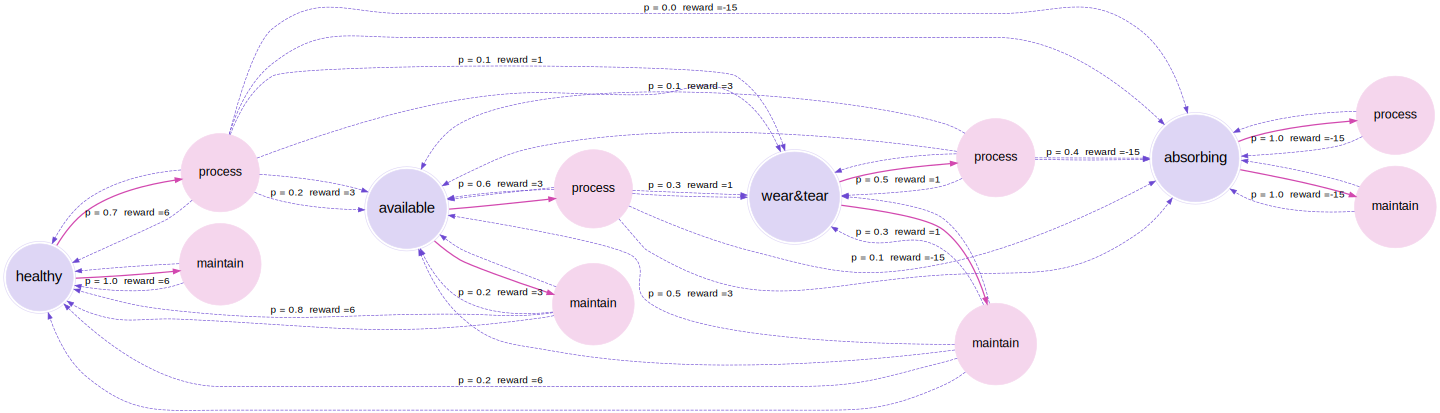

In [8]:
from IPython.display import display
if has_graphviz:
    display(plot_graph(mdp))

###**(b) (10%) 使用價值迭代來決定最佳策略以及各個狀態的價值**


In [9]:
# state-action value function Q(s, a)
def get_action_value(mdp, state_values, state, action, gamma):
    """ Computes Q(s,a) as in formula above """
    Q = [mdp.get_transition_prob(state, action, s) * (mdp.get_reward(s) + gamma * state_values[s]) for s in state_values]
    return sum(Q)

# next V(s) for value iteration
def get_new_state_value(mdp, state_values, state, gamma):
    """ Computes next V(s) as in formula above. Please do not change state_values in process. """
    if mdp.is_terminal(state): return 0

    Q = [get_action_value(mdp, state_values, state, a, gamma) for a in mdp.get_possible_actions(state)]
    return max(Q)

iter    0   |   V(healthy) = 0.000   V(available) = 0.000   V(wear&tear) = 0.000   V(absorbing) = 0.000

iter    1   |   V(healthy) = 6.000   V(available) = 5.400   V(wear&tear) = 3.000   V(absorbing) = -15.000

iter    2   |   V(healthy) = 11.400   V(available) = 10.692   V(wear&tear) = 7.320   V(absorbing) = -28.500

iter    3   |   V(healthy) = 16.260   V(available) = 15.533   V(wear&tear) = 11.840   V(absorbing) = -40.650

iter    4   |   V(healthy) = 20.634   V(available) = 19.903   V(wear&tear) = 16.113   V(absorbing) = -51.585

iter    5   |   V(healthy) = 24.571   V(available) = 23.839   V(wear&tear) = 20.021   V(absorbing) = -61.427

iter    6   |   V(healthy) = 28.114   V(available) = 27.382   V(wear&tear) = 23.556   V(absorbing) = -70.284

iter    7   |   V(healthy) = 31.302   V(available) = 30.570   V(wear&tear) = 26.742   V(absorbing) = -78.255

iter    8   |   V(healthy) = 34.172   V(available) = 33.440   V(wear&tear) = 29.612   V(absorbing) = -85.430

iter    9   |   V(h

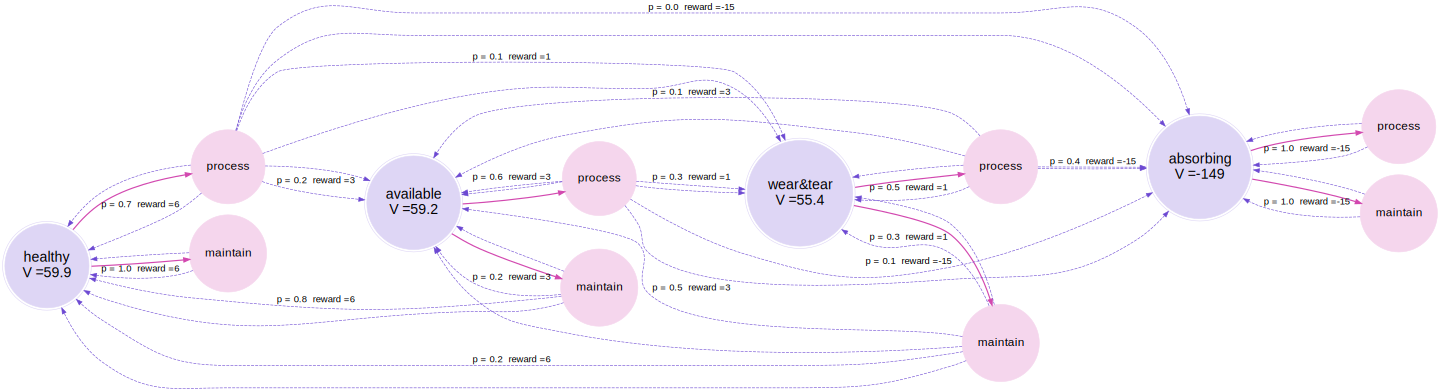


Final state values: {'healthy': 59.996668002796476, 'available': 59.26496068572331, 'wear&tear': 55.436026505970545, 'absorbing': -149.9916700069912}


In [10]:
# parameters
gamma = 0.9             # discount for MDP
num_iter = 1000         # maximum iterations, excluding initialization
min_difference = 0.001  # stop VI if new values are this close to old values (or closer)

# initialize V(s)
state_values = {s : 0 for s in mdp.get_all_states()}

for i in range(num_iter):
    # Compute new state values using the functions you defined above.
    # It must be a dict {state : float V_new(state)}
    new_state_values = { state: get_new_state_value(mdp, state_values, state, gamma)
        for state in mdp.get_all_states()
    }   
    assert isinstance(new_state_values, dict)
    
    # Compute difference
    diff = max(abs(new_state_values[s] - state_values[s]) for s in mdp.get_all_states())
    print("iter %4i   |   "%(i,), end="")
    print('   '.join("V(%s) = %.3f"%(s, v) for s,v in state_values.items()), end='\n\n')
    state_values = new_state_values
    
    if diff < min_difference:
        print("Terminated"); break
        
if has_graphviz:
    display(plot_graph_with_state_values(mdp, state_values))
print()
print("Final state values:", state_values)

In [11]:
# 最佳策略
print("Healthy:", get_optimal_action(mdp, state_values, 'healthy', gamma=0.9))
print("Available:", get_optimal_action(mdp, state_values, 'available', gamma=0.9))
print("Wear&tear:", get_optimal_action(mdp, state_values, 'wear&tear', gamma=0.9))
print("Damaged:", get_optimal_action(mdp, state_values, 'damaged', gamma=0.9))

Healthy: maintain
Available: maintain
Wear&tear: maintain
Damaged: None


###**(c) (10%) 使用策略迭代來決定最佳策略以及各個狀態的價值，假設初始策略為在所有狀態皆採取行動「加工」**


In [12]:
# Evaluation
def compute_vpi(mdp, policy, gamma, num_iter=1000, min_difference=1e-5):
    """
    Computes V^pi(s) FOR ALL STATES under given policy.
    :param policy: a dict of currently chosen actions {s : a}
    :returns: a dict {state : V^pi(state) for all states}
    """
    index_s = {i: s for i, s in enumerate(mdp.get_all_states())}
    s_index = {s: i for i, s in enumerate(mdp.get_all_states())}
    
    ns = len(mdp.get_all_states())
    a, b = np.zeros((ns, ns)), np.zeros(ns)
    for i in range(ns):
        b_v = 0
        state = index_s[i]
        a[i][i] = 1 - mdp.get_transition_prob(state, policy[state], state) * gamma
        for s_prime in mdp.get_next_states(state, policy[state]):
            if s_prime == state: continue
            a[i][s_index[s_prime]] = \
                -mdp.get_transition_prob(state, policy[state], s_prime) * gamma
            b_v += mdp.get_transition_prob(state, policy[state], s_prime) *\
                mdp.get_reward(s_prime)
        b[i] = b_v

    solution = np.linalg.solve(a, b)
    return {index_s[i]: v for i, v in enumerate(solution)}

# Improvement
def compute_new_policy(mdp, vpi, gamma):
    """
    Computes new policy as argmax of state values
    :param vpi: a dict {state : V^pi(state) for all states}
    :returns: a dict {state : optimal action for all states}
    """
    return {state: get_optimal_action(mdp, vpi, state, gamma) for state in mdp.get_all_states()}

In [13]:
def policy_iteration(mdp, policy=None, gamma = 0.9, num_iter = 1000, min_difference = 1e-5):
    """ 
    Run the policy iteration loop for num_iter iterations or till difference between V(s) is below min_difference.
    If policy is not given, initialize it at random.
    """
    if policy == None:
        policy = {s: np.random.choice(mdp.get_possible_actions(s)) for s in mdp.get_all_states()}
    assert type(policy) is dict, 'policy must be type dict'
    vpi = {state: 0.0 for state in mdp.get_all_states()}
    policy_stable = False
    while not policy_stable:
        print("====================== Policy Evaluation ======================")
        for i in range(num_iter):
            new_vpi = compute_vpi(mdp, policy, gamma)
            diff = max(abs(new_vpi[s]-vpi[s]) for s in mdp.get_all_states())
            vpi = new_vpi
            print('iter: {}, diff: {}'.format(i, diff))
            if diff < min_difference:
                break

        print("====================== Policy Improvement ======================")
        old_policy = policy
        policy = compute_new_policy(mdp, new_vpi, gamma)
        policy_stable = old_policy == policy
        if not policy_stable:
            print("Policy is not stable yet, go back to Policy Evaluation")
        else:
            print("Policy is stable :D")
            print("Optimal Q value:", vpi)
            print("Optimal Policy:", policy)

    return vpi, policy

#### **初始策略為「加工」**

====================== Policy Evaluation ======================
iter: 0, diff: 7.826086956521738
iter: 1, diff: 0.0
====================== Policy Improvement ======================
Policy is not stable yet, go back to Policy Evaluation
====================== Policy Evaluation ======================
iter: 0, diff: 12.571184995737426
iter: 1, diff: 0.0
====================== Policy Improvement ======================
Policy is stable :D
Optimal Q value: {'healthy': 0.0, 'available': 5.333333333333334, 'wear&tear': 4.745098039215686, 'absorbing': 0.0}
Optimal Policy: {'healthy': 'maintain', 'available': 'maintain', 'wear&tear': 'maintain', 'absorbing': 'process'}


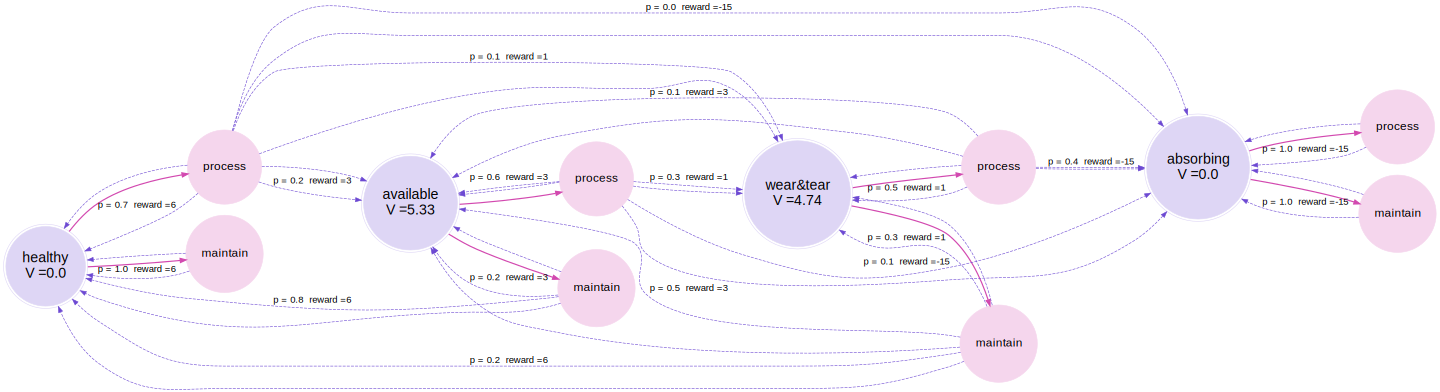

In [14]:
process_policy = {s: 'process' for s in mdp.get_all_states()}
vpi_process, policy_process = policy_iteration(mdp, policy=process_policy, gamma=0.5, num_iter=1000, min_difference=1e-5)

if has_graphviz:
    display(plot_graph_with_state_values(mdp, vpi_process))

### **(d) (5%) (d)承接(c)的答案，如果初始策略在所有狀態皆採取行動「保養」，策略迭代的計算過程與結果有什麼差異?**


#### **初始策略為「保養」**

====================== Policy Evaluation ======================
iter: 0, diff: 5.333333333333334
iter: 1, diff: 0.0
====================== Policy Improvement ======================
Policy is not stable yet, go back to Policy Evaluation
====================== Policy Evaluation ======================
iter: 0, diff: 0.0
====================== Policy Improvement ======================
Policy is stable :D
Optimal Q value: {'healthy': 0.0, 'available': 5.333333333333334, 'wear&tear': 4.745098039215686, 'absorbing': 0.0}
Optimal Policy: {'healthy': 'maintain', 'available': 'maintain', 'wear&tear': 'maintain', 'absorbing': 'process'}


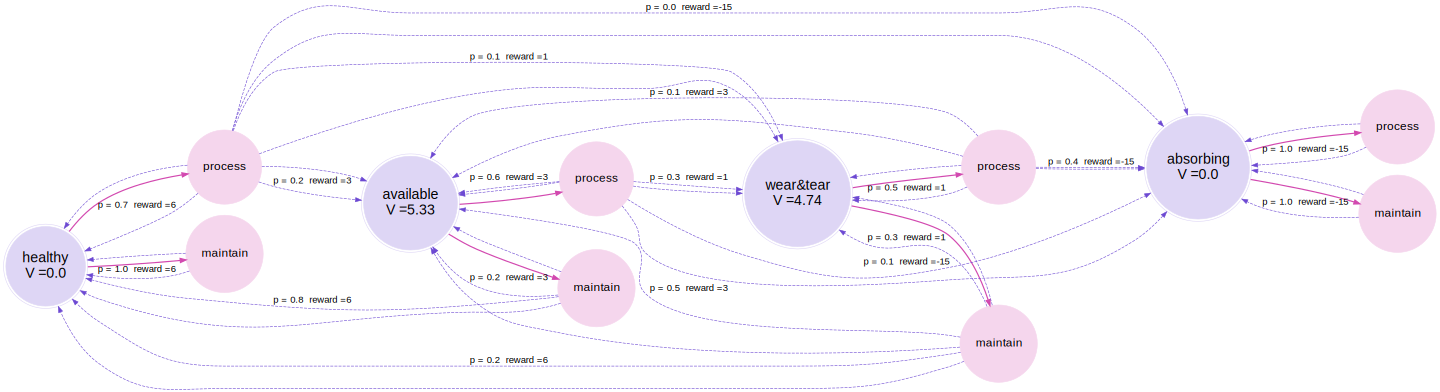

In [15]:
maintain_policy = {s: "maintain" for s in mdp.get_all_states()}
vpi_maintain, policy_maintain = policy_iteration(mdp, policy=maintain_policy, gamma=0.5, num_iter=1000, min_difference=1e-5)

if has_graphviz:
    display(plot_graph_with_state_values(mdp, vpi_maintain))

由 (c) 和 (d) 的計算過程和結果可以看到雖然初始策略與計算過程不同（diff. 不一樣），但兩者的最佳策略和各狀態的價值是相同的。